### Self-Attention and Multi-Head Attention in Tranformers

### What is Self-Attention?

Self-attention is a mechanism that allows a model to dynamically focus on different parts of an input sequence when encoding a token. It captures dependencies across all tokens in a sequence, enabling context-aware representations. This is crucial for understanding relationships between words, regardless of their distance from each other in the sequence.

**Steps in Self-Attention:**
1. **Compute Attention Scores:**  
    - Calculate dot products between the query (Q) and key (K) vectors for all tokens.
    - Scale the scores by the square root of the key dimension (\(\sqrt{d_k}\)) to stabilize gradients.
    - Apply the softmax function to convert scores into probabilities, highlighting which tokens to focus on.
2. **Weight Values:**  
    - Use the attention scores to compute a weighted sum of the value (V) vectors, producing a context-aware representation for each token.

**Mathematical Formula:**  
\[
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
\]

---

### What is Multi-Head Attention?

Multi-head attention extends the self-attention mechanism by applying several attention operations in parallel. Each attention "head" learns to focus on different aspects or relationships within the sequence, allowing the model to capture richer information.

**Steps in Multi-Head Attention:**
1. **Linear Projections:**  
    - Project the input Q, K, and V into multiple subspaces using learned weight matrices, creating multiple sets of Q, K, V for each head.
2. **Apply Self-Attention:**  
    - Perform self-attention independently for each head, allowing each to focus on different relationships.
3. **Concatenate Outputs:**  
    - Combine the outputs from all heads by concatenating them.
4. **Final Linear Projection:**  
    - Project the concatenated outputs back into the original dimension using another learned weight matrix.

**Mathematical Formula:**  
\[
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O
\]
where each head is computed as:  
\[
\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)
\]

---

### Applications of Multi-Head Attention in NLP

- **Machine Translation:**  
  Captures dependencies across languages, improving translation quality by aligning words and phrases with their correct counterparts.
- **Text Summarization:**  
  Identifies and focuses on key phrases and sentences to generate concise and informative summaries.
- **Named Entity Recognition (NER):**  
  Utilizes contextual clues to accurately detect and classify entities (such as names, locations, organizations) in text.
- **Question Answering:**  
  Helps models locate relevant information in passages to answer questions accurately.
- **Sentiment Analysis:**  
  Focuses on sentiment-bearing words and their context to determine the overall sentiment of a sentence or document.

---

**Summary:**  
Self-attention and multi-head attention are foundational components of transformer architectures, enabling models to understand complex relationships in sequential data and powering state-of-the-art results in many NLP tasks.


In [1]:
import numpy as np

define query, key and value matrixes

In [2]:
def generate_data(seq_len,embed_dim):
    np.random.seed(42)
    return np.random.randn(seq_len,embed_dim)

sequence_length =4
embedding_dim = 3
query = generate_data(sequence_length,embedding_dim)
key = generate_data(sequence_length,embedding_dim)
value = generate_data(sequence_length,embedding_dim)

# compute attention scores
scores = np.dot(query,key.T)/np.sqrt(embedding_dim)

# apply softmax to normalise the scores
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

attention_weights = softmax(scores)
# compute context vector
context = np.dot(attention_weights,value)

print("Attention Weights:")
print(attention_weights)
print("Context Vectors:")
print(context)

Attention Weights:
[[0.28620968 0.27837007 0.23915382 0.19626644]
 [0.12912678 0.3633708  0.34420457 0.16329785]
 [0.09303267 0.28865629 0.50473462 0.11357642]
 [0.1731845  0.31063448 0.25762796 0.25855307]]
Context Vectors:
[[ 1.05029142 -0.01217227 -0.08348571]
 [ 1.24973484  0.08554131 -0.23909249]
 [ 1.3445482   0.25426461 -0.2971848 ]
 [ 1.10625871 -0.01878677 -0.20192698]]


Attention Weights: tensor([[[[0.2421, 0.2589, 0.2437, 0.2553],
          [0.1956, 0.2427, 0.3284, 0.2333],
          [0.2363, 0.2325, 0.2701, 0.2611],
          [0.1649, 0.2720, 0.2963, 0.2668]],

         [[0.2305, 0.2861, 0.2835, 0.1999],
          [0.2306, 0.2793, 0.2939, 0.1962],
          [0.2181, 0.3102, 0.3054, 0.1664],
          [0.1860, 0.3033, 0.3383, 0.1723]]]], grad_fn=<SoftmaxBackward0>)        Context Vectors: tensor([[[ 0.0439,  0.2014,  0.4109, -0.1605,  0.0879, -0.2584, -0.0687,
          -0.6033],
         [ 0.0535,  0.2049,  0.3951, -0.1627,  0.0758, -0.2576, -0.0417,
          -0.6339],
         [ 0.0348,  0.1873,  0.3865, -0.1600,  0.0916, -0.2468, -0.0553,
          -0.6296],
         [ 0.0545,  0.2048,  0.3642, -0.1697,  0.0747, -0.2324, -0.0274,
          -0.6534]]], grad_fn=<ViewBackward0>)


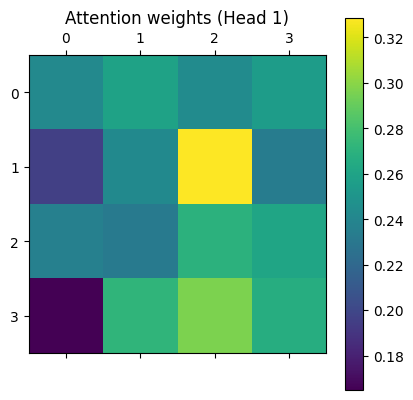

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    def __init__(self,embed_dim,num_heads):
        super(MultiHeadAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        assert embed_dim % num_heads == 0, "Embedding dimension must be divisible by number of heads"

        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.out = nn.Linear(embed_dim, embed_dim)

    def forward(self,x):
        batch_size = x.size(0)
        # linear projections
        q = self.query(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        k = self.key(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        v = self.value(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        # compute attention scores
        scores = torch.matmul(q, k.transpose(-1, -2)) / np.sqrt(self.head_dim)

        # apply softmax to normalise the scores
        attention_weights = F.softmax(scores, dim=-1)

        # compute context vector
        context = torch.matmul(attention_weights, v).transpose(1, 2).contiguous().view(batch_size, -1, self.embed_dim)

        return self.out(context), attention_weights 

# sample input
seq_len, embed_dim = 4,8
x = torch.randn(1,seq_len,embed_dim)

# instantiate MultiHeadAttention and test
mha = MultiHeadAttention(embed_dim, num_heads=2) 
context, attn_weights = mha(x)
print(f"Attention Weights: {attn_weights}        Context Vectors: {context}")

# visualise
import matplotlib.pyplot as plt
plt.matshow(attn_weights[0,0].detach().numpy(),cmap="viridis")
plt.colorbar()
plt.title("Attention weights (Head 1)")
plt.show()